In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import tensorflow as tf

In [389]:
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [390]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [391]:
len(list(data['customerID'].unique()))
#data.drop('customerID',axis=1,inplace=True)

7043

In [392]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [393]:
categorical_fetures = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                      'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                      'StreamingTV','Contract','PaperlessBilling','PaymentMethod','Churn']

In [394]:
def get_unique(data,columns):
    return {col : list(data[col].unique()) for col in columns}

In [395]:
data.drop('customerID',axis=1,inplace=True)

In [396]:
#sorted(data['TotalCharges'].unique())

In [397]:
get_unique(data,categorical_fetures)

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [398]:
data['TotalCharges'] = data['TotalCharges'].replace(' ',np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(np.float)
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

/tmp/ipykernel_32/3009294447.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['TotalCharges'] = data['TotalCharges'].astype(np.float)


In [399]:
cate = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                      'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                      'StreamingTV','Contract','PaperlessBilling','PaymentMethod','Churn']

In [400]:
def binary_encoder(data,col,positive_text):
    data[col] = data[col].apply(lambda x : 1 if x == positive_text else 0)
    return data
def ordinal_encoder(data,col):
    ordined = sorted(list(data[col].unique()))
    data[col] = data[col].apply(lambda x : ordined.index(x))
    return data
def one_hot_encoding(data,col):
    data.copy()
    dummie = pd.get_dummies(data[col])
    dummie = dummie.astype(np.float)
    data = pd.concat([data,dummie],axis=1)
    data = data.drop(col,axis=1)
    return data

In [401]:
binary_fet = ['Partner','Dependents','MultipleLines','OnlineSecurity',
             'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','PaperlessBilling','']
ordinal_fet = ['InternetService','Contract']

nominal_fet = ['PaymentMethod']

In [402]:
data['MultipleLines'].replace('No phone service','No',inplace=True)
data['OnlineSecurity'].replace('No internet service','No',inplace=True)
data['OnlineBackup'].replace('No internet service','No',inplace=True)
data['DeviceProtection'].replace('No internet service','No',inplace=True)
data['TechSupport'].replace('No internet service','No',inplace=True)
data['StreamingTV'].replace('No internet service','No',inplace=True)
data['StreamingMovies'].replace('No internet service','No',inplace=True)

In [403]:
binary_fet = ['Partner','Dependents','MultipleLines','OnlineSecurity',
             'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PhoneService']
binary_encoder(data,'gender','Female')
for col in binary_fet:
    binary_encoder(data,col,'Yes')
for col2 in ordinal_fet:
    ordinal_encoder(data,col2)
data = one_hot_encoding(data,nominal_fet)

/tmp/ipykernel_32/4212961853.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dummie = dummie.astype(np.float)


In [404]:
binary_encoder(data,'Churn','Yes')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,0,1,...,0,0,1,29.85,29.85,0,0.0,0.0,1.0,0.0
1,0,0,0,0,34,1,0,0,1,0,...,0,1,0,56.95,1889.50,0,0.0,0.0,0.0,1.0
2,0,0,0,0,2,1,0,0,1,1,...,0,0,1,53.85,108.15,1,0.0,0.0,0.0,1.0
3,0,0,0,0,45,0,0,0,1,0,...,0,1,0,42.30,1840.75,0,1.0,0.0,0.0,0.0
4,1,0,0,0,2,1,0,1,0,0,...,0,0,1,70.70,151.65,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,0,1,0,...,1,1,1,84.80,1990.50,0,0.0,0.0,0.0,1.0
7039,1,0,1,1,72,1,1,1,0,1,...,1,1,1,103.20,7362.90,0,0.0,1.0,0.0,0.0
7040,1,0,1,1,11,0,0,0,1,0,...,0,0,1,29.60,346.45,0,0.0,0.0,1.0,0.0
7041,0,1,1,0,4,1,1,1,0,0,...,0,0,1,74.40,306.60,1,0.0,0.0,0.0,1.0


In [405]:
data.dtypes == 'object'

gender                                     False
SeniorCitizen                              False
Partner                                    False
Dependents                                 False
tenure                                     False
PhoneService                               False
MultipleLines                              False
InternetService                            False
OnlineSecurity                             False
OnlineBackup                               False
DeviceProtection                           False
TechSupport                                False
StreamingTV                                False
StreamingMovies                            False
Contract                                   False
PaperlessBilling                           False
MonthlyCharges                             False
TotalCharges                               False
Churn                                      False
PaymentMethod_Bank transfer (automatic)    False
PaymentMethod_Credit

In [406]:
y = data['Churn']
X = data.drop('Churn',axis=1)

In [407]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [408]:
x_train , x_test , y_train , y_test = train_test_split(X,y,train_size=0.75)

In [409]:
y.sum() / len(y)

0.2653698707936959

In [421]:
inputs = tf.keras.Input(22)
x = tf.keras.layers.Dense(64,activation='relu')(inputs)
x = tf.keras.layers.Dense(64,activation='relu')(x)
output = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs,outputs=output)

model.compile(
optimizer = 'adam',
loss = 'binary_crossentropy',
metrics =[tf.metrics.AUC(name='auc')]
)

epochs = 7

history = model.fit(
x_train,
y_train,
validation_split=0.2,
batch_size=64,
epochs=epochs,
callbacks=tf.keras.callbacks.ReduceLROnPlateau(),
verbose=0
)

Recomended Epochs: 3


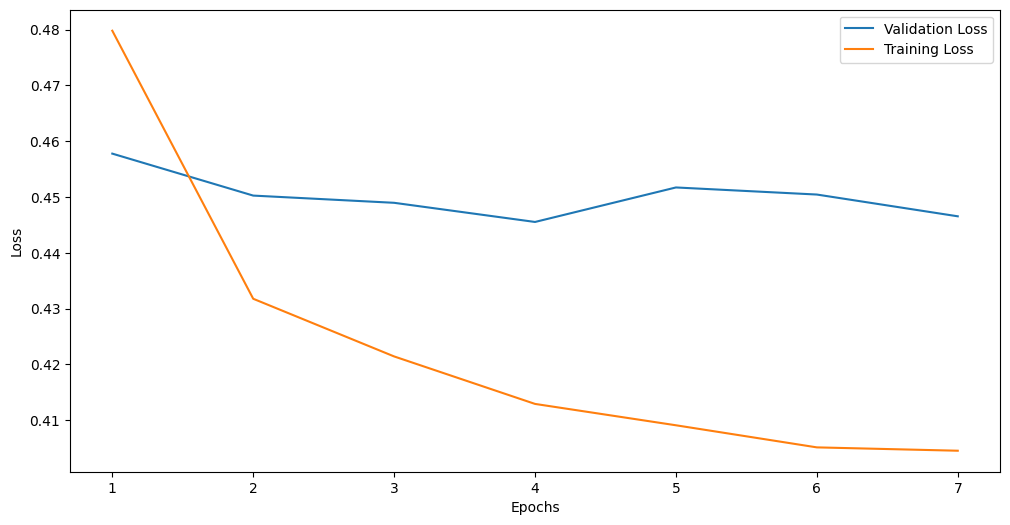

In [422]:
plt.figure(figsize=(12,6))
plt.plot(range(1,epochs+1),history.history['val_loss'],label='Validation Loss')
plt.plot(range(1,epochs+1),history.history['loss'],label='Training Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
print('Recomended Epochs:',np.argmin(history.history['val_loss']))
plt.show()